The GitHub link for this Project Planning Report is https://github.com/Matthew-1478088/Individual-Project-Planning-Group-12

# Part 1, Data Description:
There are two datasets that we will be looking at, one about all the players that participated in the experiment, with 196 observations, meaning 196 players. The other dataset is about all the play sessions, with 1535 observations, or play sessions in the dataset. This dataset was collected with a combination of surveys as well as recordings of the start and end times of play sessions. There are 7 variables in the player dataset and 5 in the session dataset, with one variable being shared between them. Some issues with the dataset is due to info coming from a survey, some data is missing from the player dataset and some data could also be biased as a result of coming from a survey. The variables of the datasets are shown below:

Player_Data:
| Variable Name     | Data Type | Meaning       |
|:---------|:---:|:-----------:|
| experience    | Character  | Self Reported Experience with Minecraft   |
| subscribe      | Boolean  | Whether they have a subscription or not     |
| hashedEmail  | Character  | Players email encrypted for privacy    | 
| played_hours  | Double  | Total Hours played by the player    |
| name  | Character  | Name of player    |
| gender  | Character  | Gender of player    |
| Age  | Double  | Age of player    |

Session_Data:
| Variable Name     | Data Type | Meaning       |
|:---------|:---:|:-----------:|
| hashedEmail    | Character  |Session players email hashed for privacy     |
| start_time	      | Character  | Start time in a encrypted and time format  |
| end_time  | Character  | End time in a date and time format   | 
| original_start_time  | Double  | Start time in a single number format  |
| original_end_time   | Double  |  End time in a single number format    |


# Part 3, Exploratory Data Analysis and Visualization:

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
player_data
session_data

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [41]:
mean <- summarize(player_data, mean_played_hours = round(mean(player_data$played_hours, na.rm=TRUE), 2),
                 mean_player_age = round(mean(player_data$Age, na.rm=TRUE), 2))
mean

mean_played_hours,mean_player_age
<dbl>,<dbl>
5.85,21.14


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


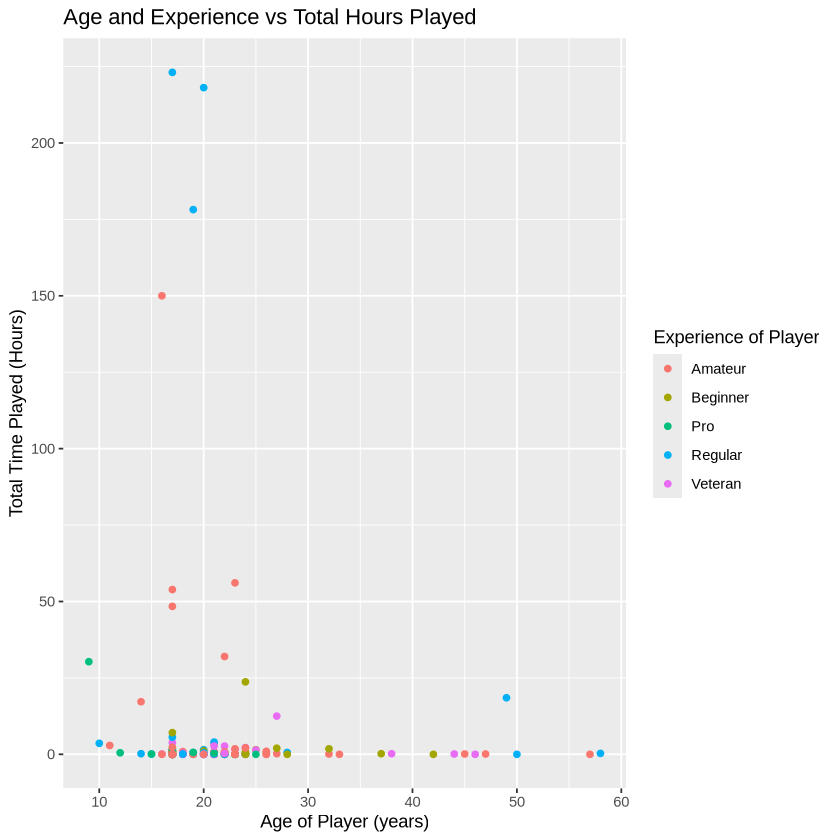

In [38]:
age_experience_plot <- player_data |>
                ggplot(aes(x = Age, y = played_hours)) +
                geom_point(aes(colour = experience)) +
                xlab("Age of Player (years)") +
                ylab("Total Time Played (Hours)") +
                labs(color = "Experience of Player", title = "Age and Experience vs Total Hours Played")
age_experience_plot

Warning message in scale_y_continuous(trans = "log10"):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


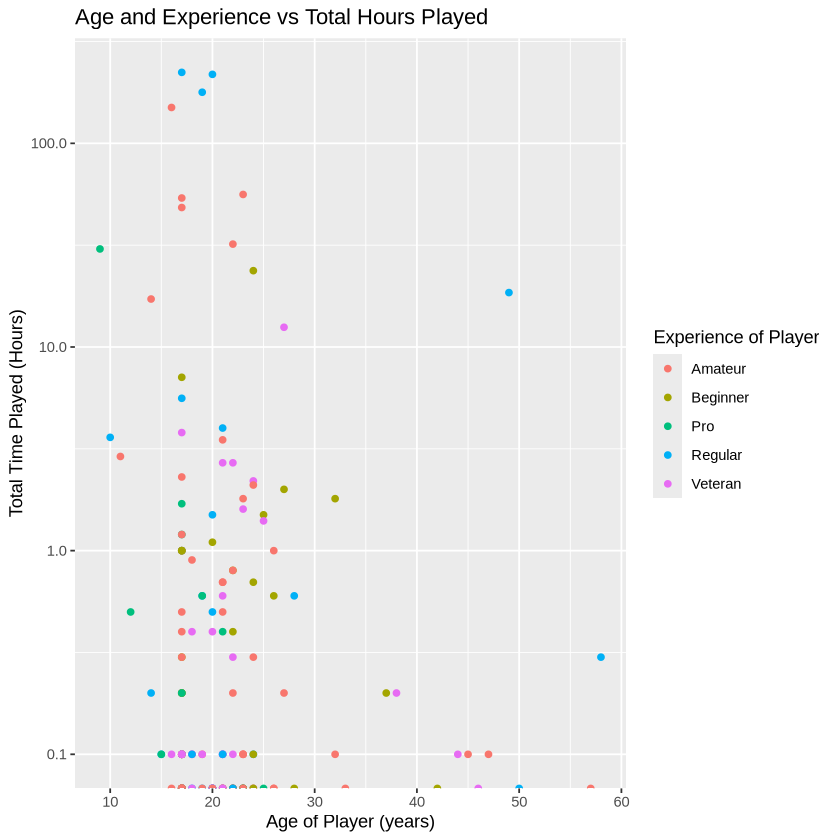

In [39]:
age_experience_log_plot <- player_data |>
                ggplot(aes(x = Age, y = played_hours)) +
                geom_point(aes(colour = experience)) +
                xlab("Age of Player (years)") +
                ylab("Total Time Played (Hours)")  +
                scale_y_continuous(trans='log10')  +
                labs(color = "Experience of Player", title = "Age and Experience vs Total Hours Played")
age_experience_log_plot

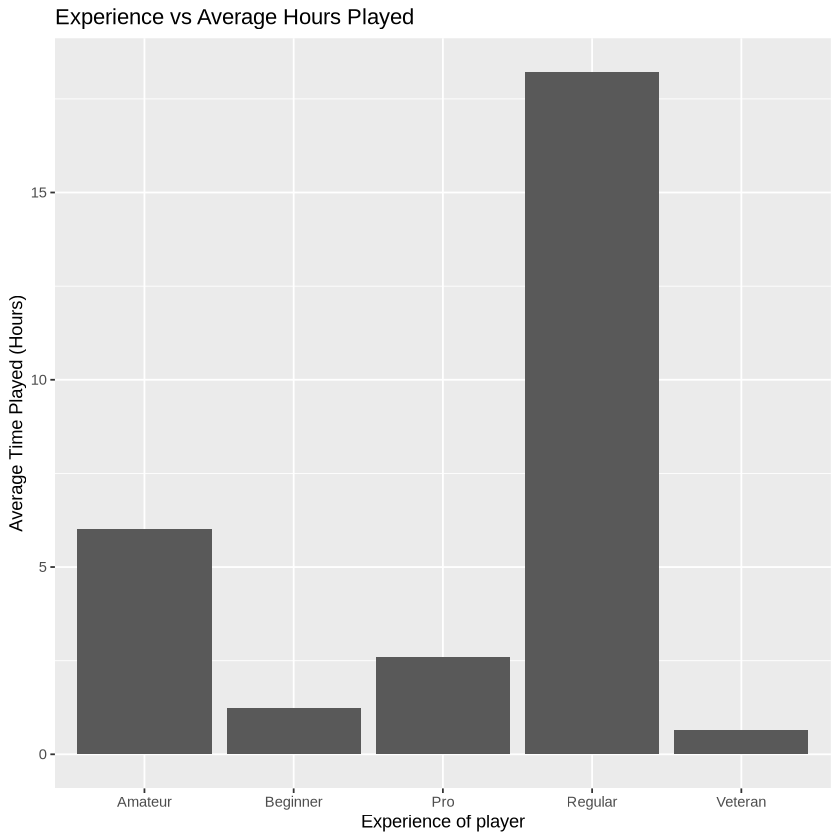

In [42]:
experience_plot <- player_data |>
                group_by(experience) |>
                summarise(mean = mean(played_hours)) |>
                ggplot(aes(x = experience, y = mean)) +
                geom_bar(stat= "Identity") +
                xlab("Experience of player") +
                ylab("Average Time Played (Hours)") +
                labs(title = "Experience vs Average Hours Played")
experience_plot

some insights from the plots I have made is that there are relationships between age and experience, and the total time played, so it is likely possible to predict play time using those variables. other insights from the age vs time played plot i made are that a lot of players have a low playtime of 0 or 1 hours, and also that there are a couple of players who have a play time much higher than the other players in the data set, with play times of around 200 hours.

# Part 4, Methods and Plan:
The method I have chosen to address my question of interest is to test both k-nn and linear regression, the reason I have chosen this is firstly that i am trying to predict a numerical variable so I should use a regression model and not a classification model. Due to being unable to determine if the relationship between the variables is linear or not, both regression models will be tested and compared to find the better one. Some limitations of this method is that some outliers with extremely high play times could affect the results, and the relatively small size of the dataset may make predictions less accurate. I am going to compare the models based on their rmspe on the testing sets. Experience will be converted to numerical scale, and both experience and age will be scaled. the dataset will be split 80-20 for training and testing sets. Cross-validation with a split into 5 folds will be used to find the best k for the k-nn model.